In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
import pandas as pd
patient = pd.read_csv("patient.csv")

patient

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1.0,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2.0,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3.0,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4.0,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5.0,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6280,6281.0,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-05,NaN,NaN,isolated
6281,6282.0,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-05,NaN,NaN,isolated
6282,6283.0,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-05,NaN,NaN,isolated
6283,6284.0,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-05,NaN,NaN,isolated


In [3]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6285 entries, 0 to 6284
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                6284 non-null   float64
 1   sex               421 non-null    object 
 2   birth_year        408 non-null    float64
 3   country           6283 non-null   object 
 4   region            409 non-null    object 
 5   group             83 non-null     object 
 6   infection_reason  146 non-null    object 
 7   infection_order   35 non-null     float64
 8   infected_by       70 non-null     float64
 9   contact_number    50 non-null     float64
 10  confirmed_date    6284 non-null   object 
 11  released_date     38 non-null     object 
 12  deceased_date     23 non-null     object 
 13  state             6284 non-null   object 
dtypes: float64(5), object(9)
memory usage: 687.6+ KB


In [4]:
patient['age'] = 2020 - patient['birth_year']

In [5]:
deceased = patient.loc[patient['state'] == 'deceased']
released = patient.loc[patient['state'] == 'released']
isolated = patient.loc[patient['state'] == 'isolated']

In [5]:
#Adding one more feature to deceased dataset which will contain the number of days patient survived.
date_column = ["confirmed_date","deceased_date"]
for i in date_column:
    deceased[i] = pd.to_datetime(deceased[i])
deceased["no_of_days_survived"] = deceased["deceased_date"] - deceased["confirmed_date"]
deceased.head(5)

C:\Users\Sarah\AppData\Local\Temp\ipykernel_3188\401409077.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deceased[i] = pd.to_datetime(deceased[i])
C:\Users\Sarah\AppData\Local\Temp\ipykernel_3188\401409077.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deceased[i] = pd.to_datetime(deceased[i])
C:\Users\Sarah\AppData\Local\Temp\ipykernel_3188\401409077.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age,no_of_days_survived
37,38.0,female,1963.0,Korea,Daegu,NaN,NaN,NaN,NaN,NaN,2020-02-18,NaN,2020-02-23,deceased,57.0,5 days
53,54.0,male,1963.0,Korea,Gyeongsangbuk-do,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-19,NaN,2020-02-23,deceased,57.0,4 days
54,55.0,male,1961.0,Korea,Gyeongsangbuk-do,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-19,NaN,2020-02-23,deceased,59.0,4 days
103,104.0,male,1957.0,Korea,Gyeongsangbuk-do,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-20,NaN,2020-02-19,deceased,63.0,-1 days
106,107.0,male,1953.0,Korea,Gyeongsangbuk-do,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-21,NaN,2020-02-24,deceased,67.0,3 days


In [6]:
#Adding one more feature to deceased dataset which will contain the number of days patient was admitted before discharged.
date_column = ["confirmed_date","released_date"]
for i in date_column:
    released[i] = pd.to_datetime(released[i])
released["no_of_days_treated"] = released["released_date"] - released["confirmed_date"]
released.head(5)

C:\Users\Sarah\AppData\Local\Temp\ipykernel_3188\2156689451.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  released[i] = pd.to_datetime(released[i])
C:\Users\Sarah\AppData\Local\Temp\ipykernel_3188\2156689451.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  released[i] = pd.to_datetime(released[i])
C:\Users\Sarah\AppData\Local\Temp\ipykernel_3188\2156689451.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age,no_of_days_treated
0,1.0,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released,36.0,17 days
1,2.0,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released,56.0,12 days
2,3.0,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released,54.0,17 days
3,4.0,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released,56.0,13 days
4,5.0,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released,33.0,32 days


In [6]:
print('The percentage of released patient is: ',(len(released) * 100) / len(patient))
print('The percentage of deceased patient is: ',(len(deceased) * 100) / len(patient))
print('The percentage of isolated patient is: ',(len(isolated) * 100) / len(patient))

The percentage of released patient is:  0.6364359586316627
The percentage of deceased patient is:  0.36595067621320604
The percentage of isolated patient is:  98.98170246618933


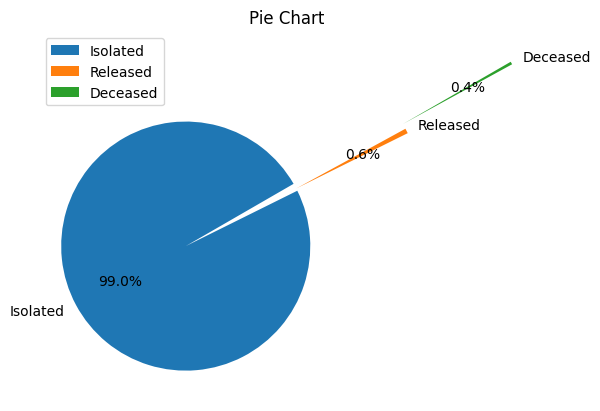

In [8]:
state = 'Isolated', 'Released', 'Deceased'
sizes = [(len(isolated) * 100) / len(patient),(len(released) * 100) / len(patient),(len(deceased) * 100) / len(patient)]
explode = (0,1,2)
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=state, autopct='%.1f%%',
        shadow=False, startangle=30)
ax.axis('equal')
plt.legend()
plt.title('Pie Chart')
plt.show()

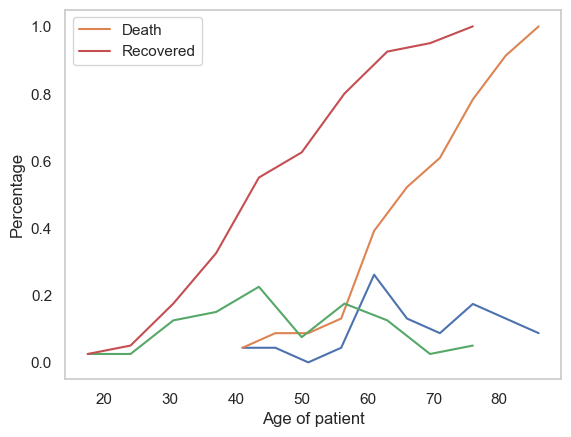

In [16]:
counts, bin_edges = np.histogram(deceased['age'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf, label = 'Death')
counts, bin_edges = np.histogram(released['age'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf, label = 'Recovered')
plt.xlabel('Age of patient')
plt.ylabel('Percentage')
plt.legend()
plt.grid()
plt.show()

In [8]:
patient.state.dtype

dtype('O')

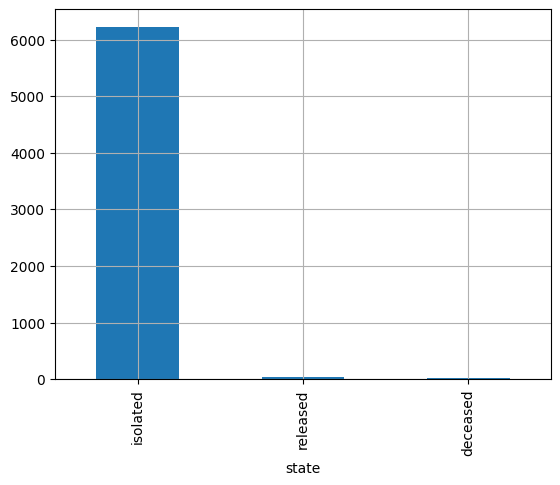

In [7]:
patient.state.value_counts().plot.bar().grid()

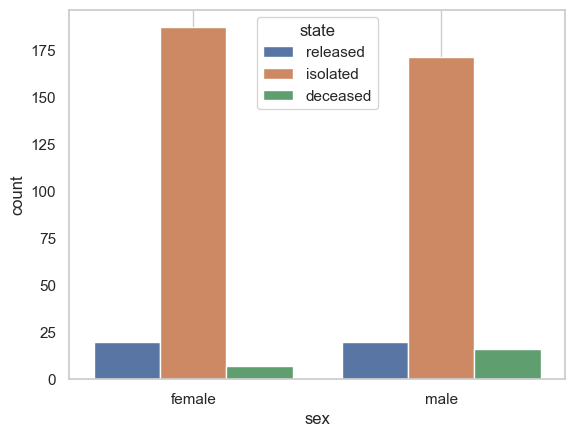

In [18]:
sns.countplot(x="sex", hue="state", data=patient).grid()

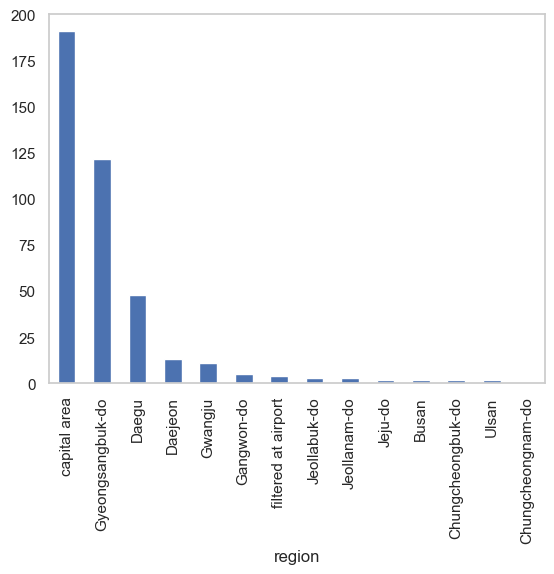

In [19]:
patient.region.value_counts().plot.bar().grid()

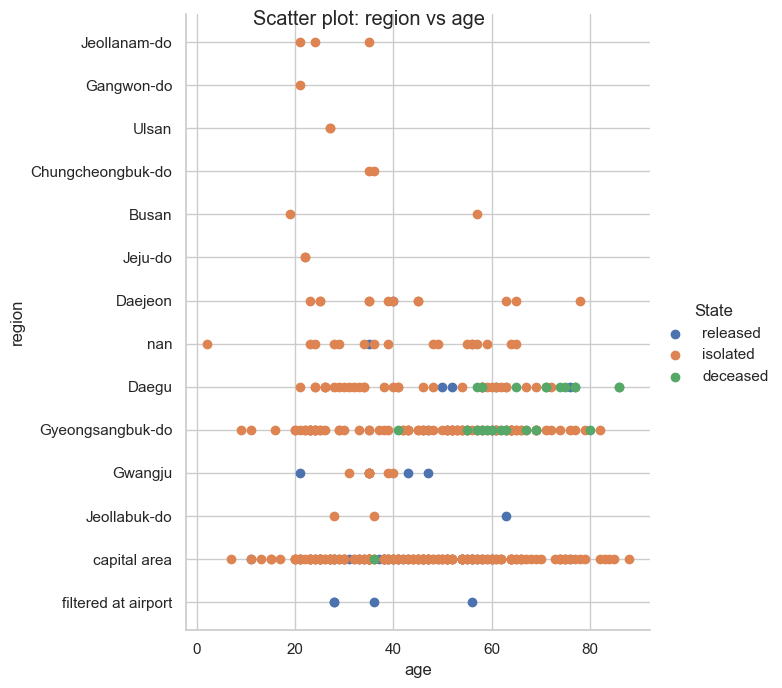

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove rows with missing or invalid values in 'region' and 'age' columns
patient_clean = patient.dropna(subset=['region', 'age'])

sns.set_style("whitegrid")

sns.FacetGrid(patient_clean, hue='state', height=7) \
    .map(plt.scatter, 'age', 'region') \
    .add_legend(title='State') \
    .fig.suptitle('Scatter plot: region vs age')
plt.show()